In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv("../data/raw/swiggy.csv")

In [3]:
df.shape 

(45593, 20)

In [4]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

**Corrections**: 

1. Age column should be numerical 
2. Ratings should be float 
3. Date and time columns should be datetime 
4. Vehicle condition should be categorical but integer encodeed 
5. target column should be in number

In [7]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
35594,0xd1fc,KOLRES01DEL02,34,4.8,22.514688,88.393294,22.594688,88.473294,14-02-2022,23:25:00,23:40:00,conditions Windy,Low,0,Meal,motorcycle,0,No,Metropolitian,(min) 22
11440,0x9d61,RANCHIRES01DEL03,31,4.4,23.416792,85.316842,23.446792,85.346842,09-03-2022,21:45:00,22:00:00,conditions Windy,Jam,2,Meal,scooter,1,No,Urban,(min) 32
15298,0xa740,RANCHIRES13DEL01,37,4.6,23.374989,85.335486,23.384989,85.345486,09-03-2022,12:00:00,12:10:00,conditions Sunny,High,1,Buffet,scooter,1,No,Urban,(min) 23
1427,0x41d,SURRES04DEL03,NaN,NaN,21.173493,72.801953,21.203493,72.831953,17-03-2022,NaN,23:25:00,conditions NaN,NaN,0,Snack,motorcycle,1,No,Metropolitian,(min) 28
19229,0xdbd5,KOLRES04DEL01,37,4.1,22.538731,88.364878,22.548731,88.374878,11-02-2022,09:10:00,09:25:00,conditions Sandstorms,Low,0,Meal,motorcycle,1,No,Metropolitian,(min) 24
8884,0xaeef,BANGRES010DEL03,22,4.7,12.933298,77.614293,12.963298,77.644293,13-03-2022,18:10:00,18:25:00,conditions Cloudy,Medium,2,Meal,scooter,0,No,Metropolitian,(min) 15
12614,0xd073,AGRRES13DEL01,21,4.8,27.159795,78.042990,27.269795,78.152990,18-02-2022,17:15:00,17:25:00,conditions Sandstorms,Medium,0,Drinks,motorcycle,1,No,Metropolitian,(min) 30
2125,0xa2c1,INDORES12DEL03,33,5,22.748060,75.893400,22.778060,75.923400,05-03-2022,18:55:00,19:05:00,conditions Sandstorms,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
19309,0x7beb,PUNERES13DEL02,33,4.9,18.562450,73.916619,18.692450,74.046619,02-03-2022,18:35:00,18:45:00,conditions Windy,Medium,2,Drinks,scooter,1,No,Metropolitian,(min) 24
37020,0x439d,SURRES18DEL03,20,4.8,21.149834,72.778666,21.179834,72.808666,30-03-2022,18:30:00,18:45:00,conditions Fog,Medium,2,Drinks,scooter,1,No,Urban,(min) 15


In [10]:
df[df['ID']=='0x1b5b ']['Delivery_person_Age'][231]

'NaN '

In [11]:
(df == "NaN ").sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [12]:
(df == "NaN ").sum().sum()

np.int64(8515)

In [13]:
df.replace("NaN " , np.nan)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [14]:
df.replace("NaN " , np.nan).isna().sum().sum()

np.int64(8515)

In [15]:
df.Weatherconditions.value_counts()

Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [16]:
(df.loc[: , "Weatherconditions"].str.replace("conditions ", "")
.replace("NaN", np.nan).isna().sum())

np.int64(616)

In [17]:
# df with all missing values replace with np.nan


missing_df = (df.replace("NaN " , np.nan).assign
              (Weatherconditions = lambda df_ :(
                  df_['Weatherconditions'].str.replace("conditions ","")
                  .replace("NaN", np.nan)
              )))

In [18]:
missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [19]:
missing_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [20]:
missing_df.isna().sum().sum()

np.int64(9131)

<Axes: >

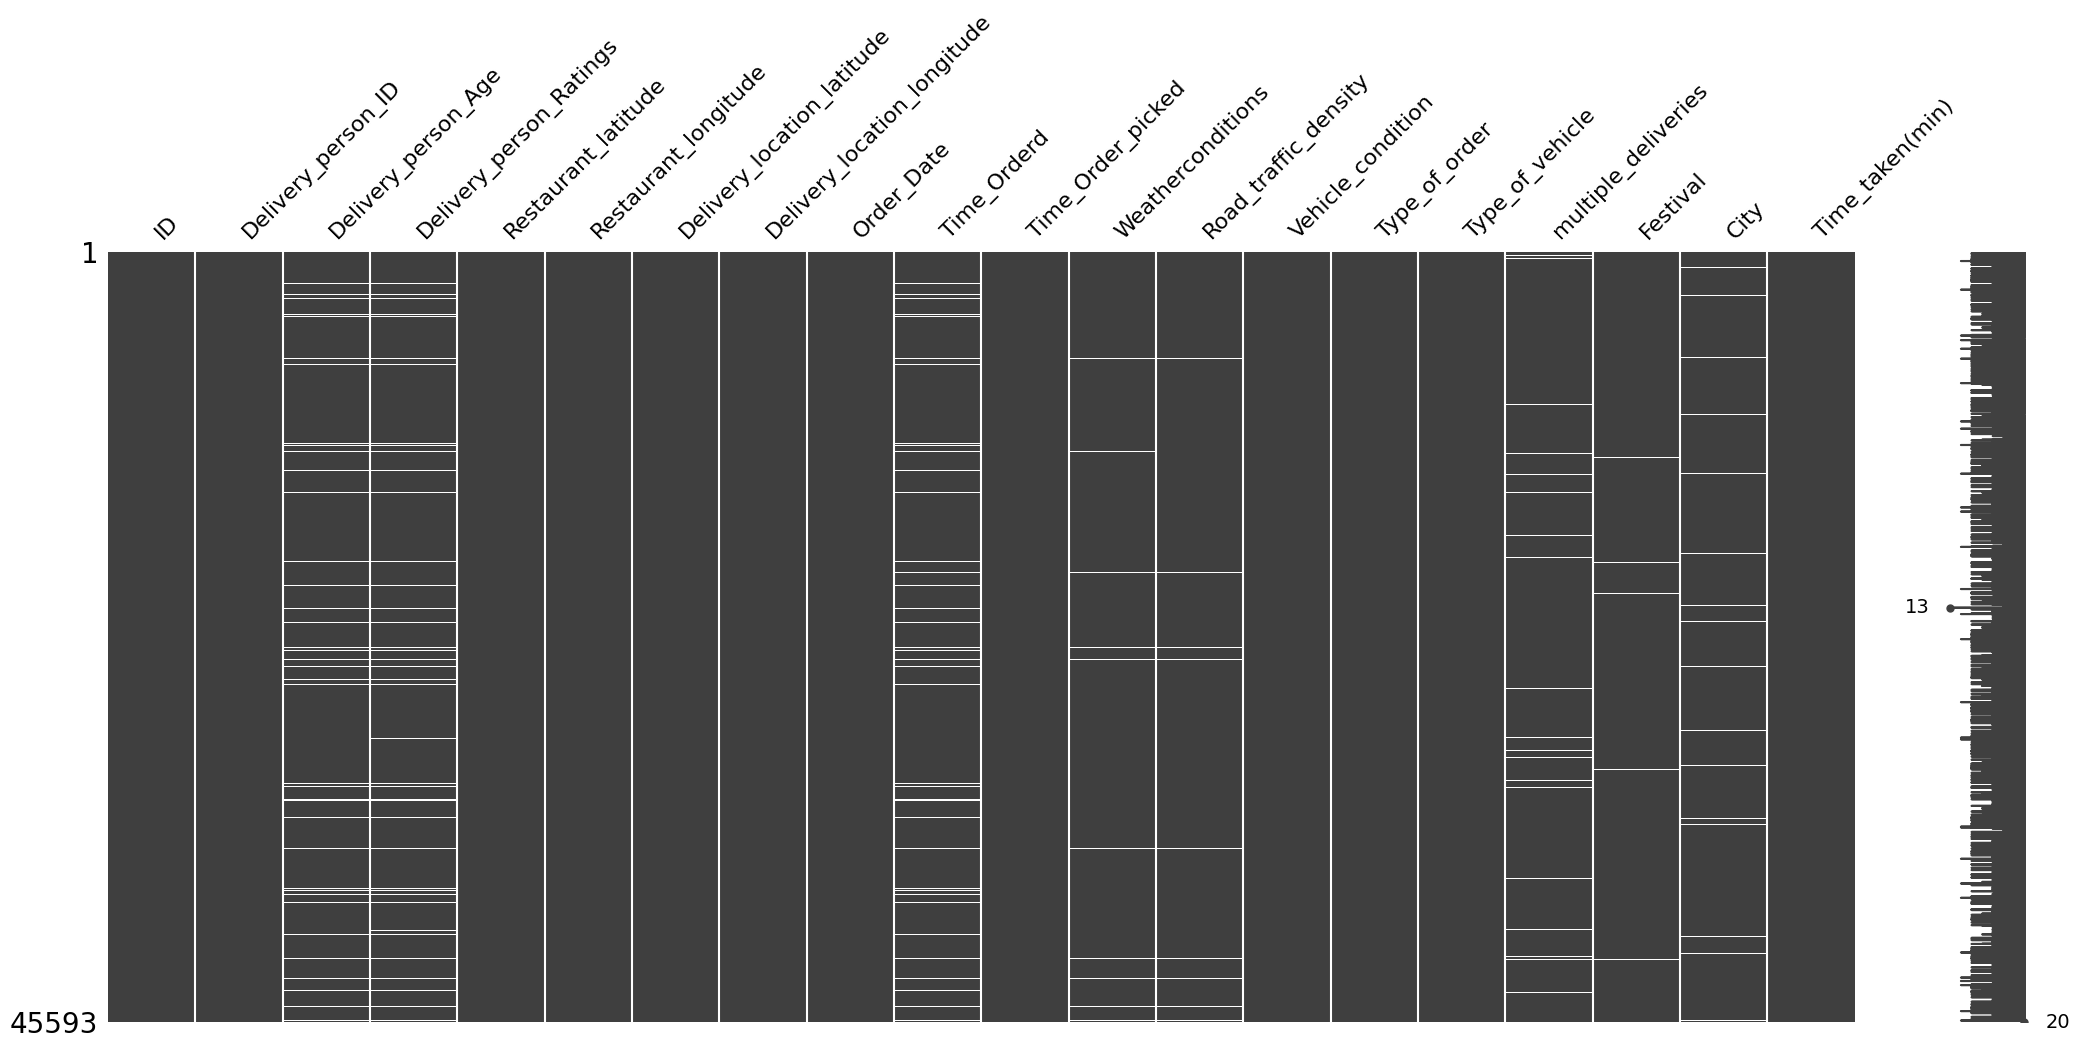

In [21]:
msno.matrix(missing_df)

<Axes: >

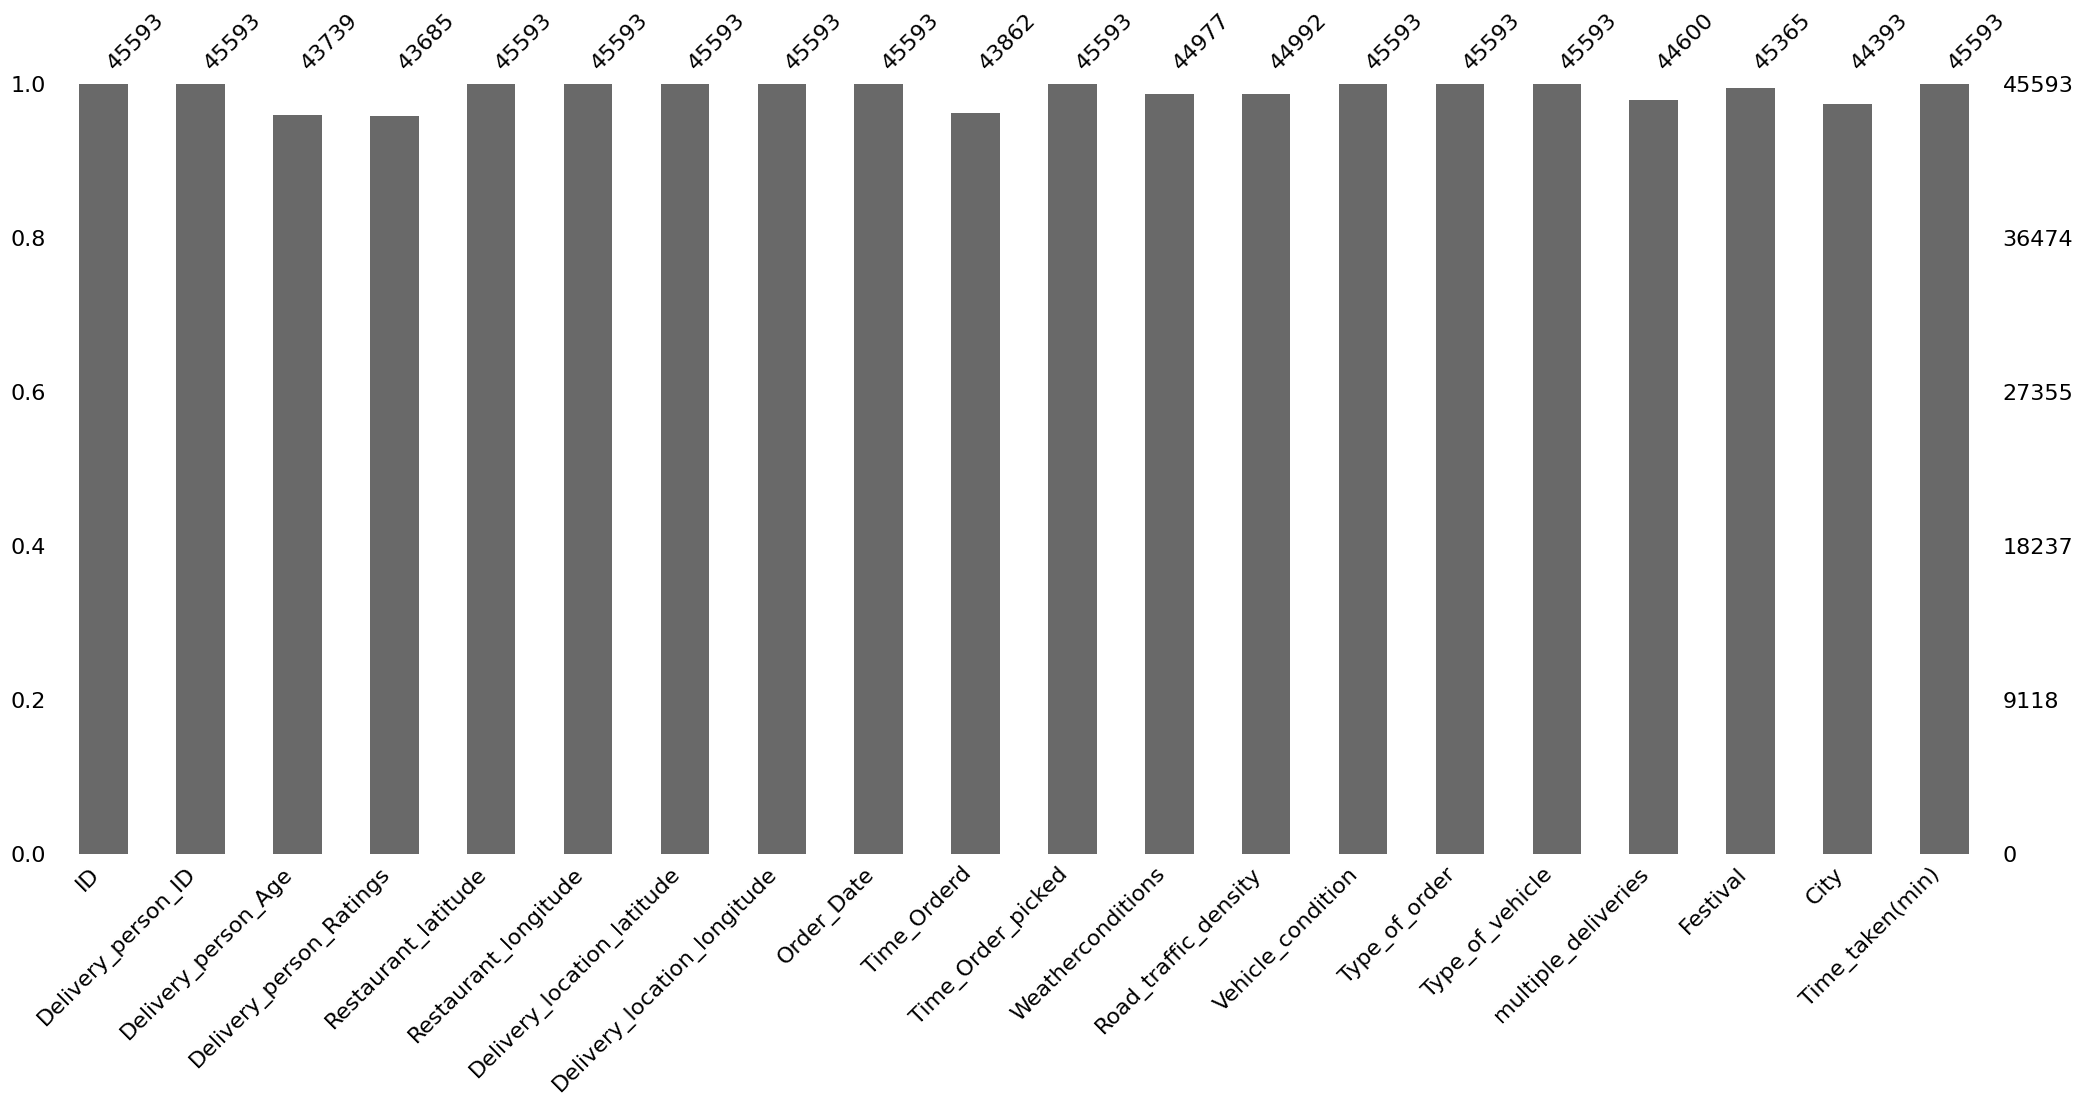

In [22]:
msno.bar(missing_df)

<Axes: >

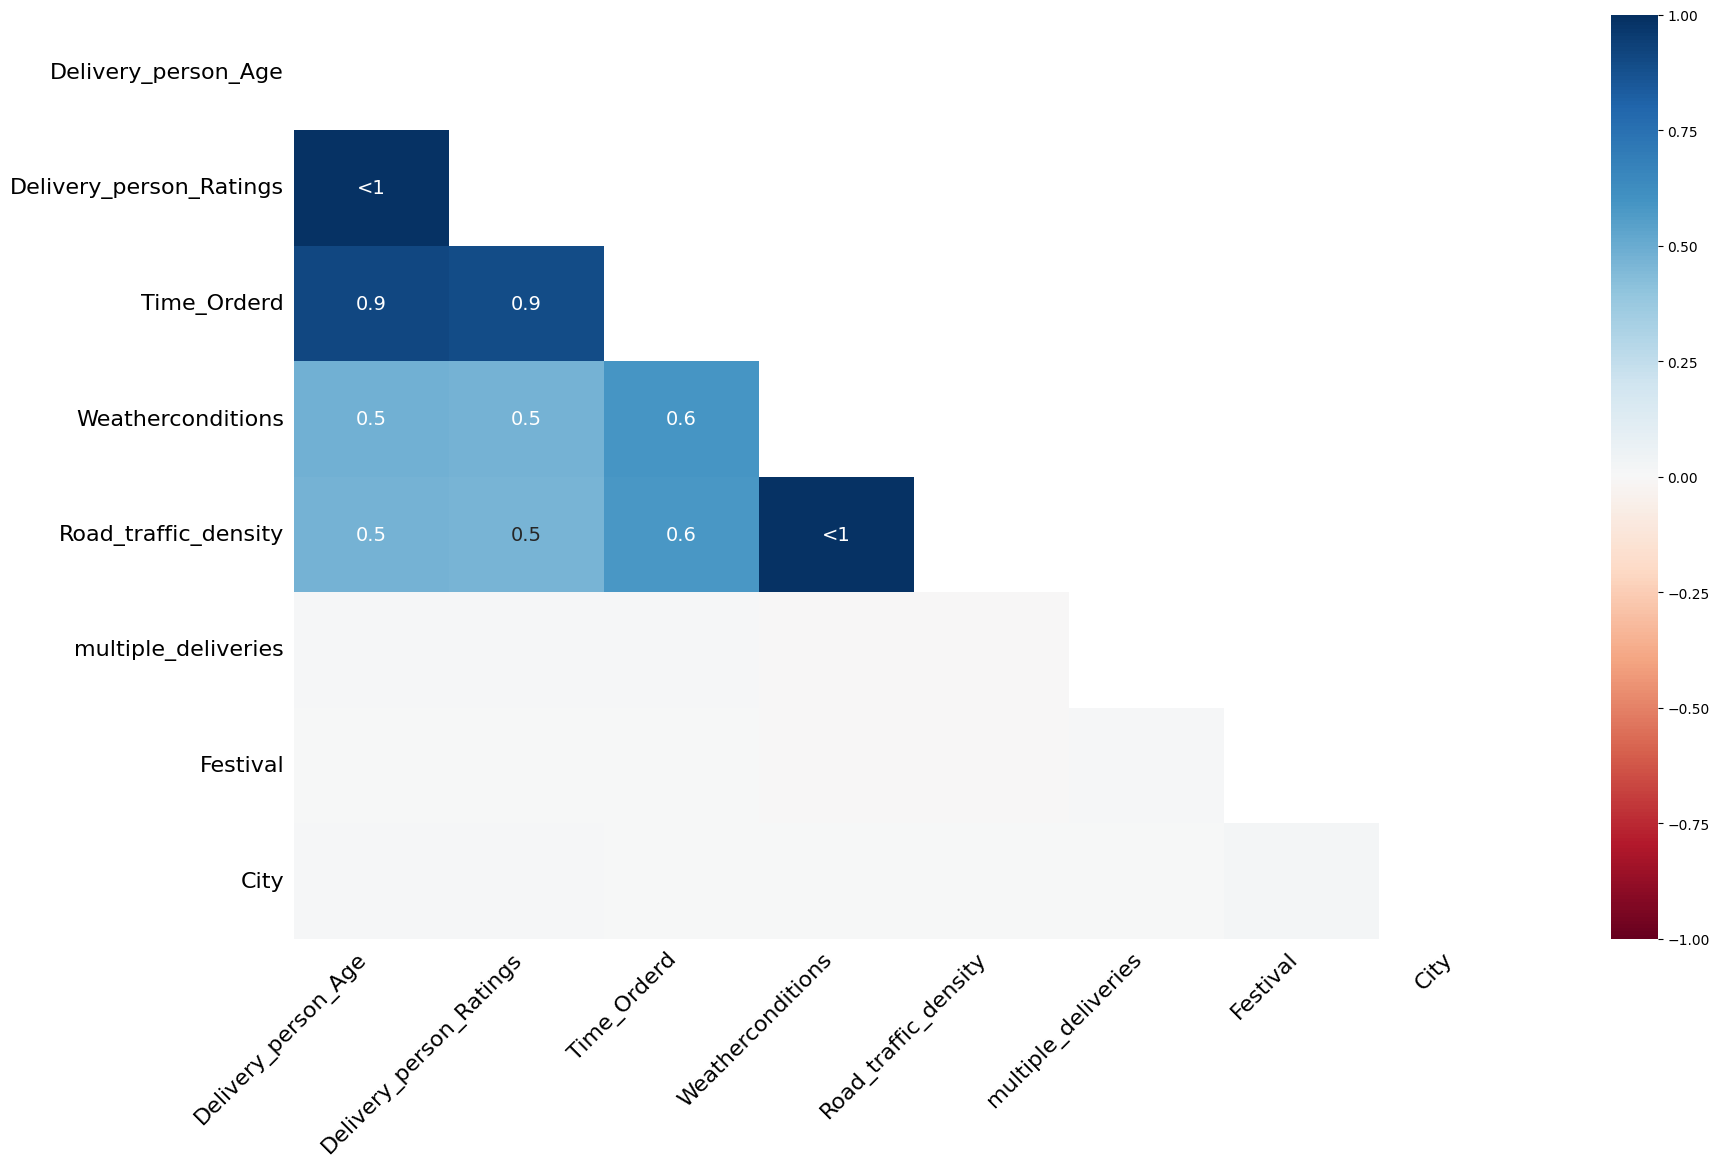

In [23]:
msno.heatmap(missing_df)

**Observations** 

1. The delievery person columns are correlated to each other. This means the missingness in these columns is highly realted which means lack of rider data. 

2. The time ordered column is also realted to the rider which shows that the data might be missing due to some network error where the system was unable to log rider details and time of order . 

3. There is very high corrleation between weather patterns and the road traffic information. 

In [24]:
missing_df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

Weatherconditions       616
Road_traffic_density    601
dtype: int64

<Axes: >

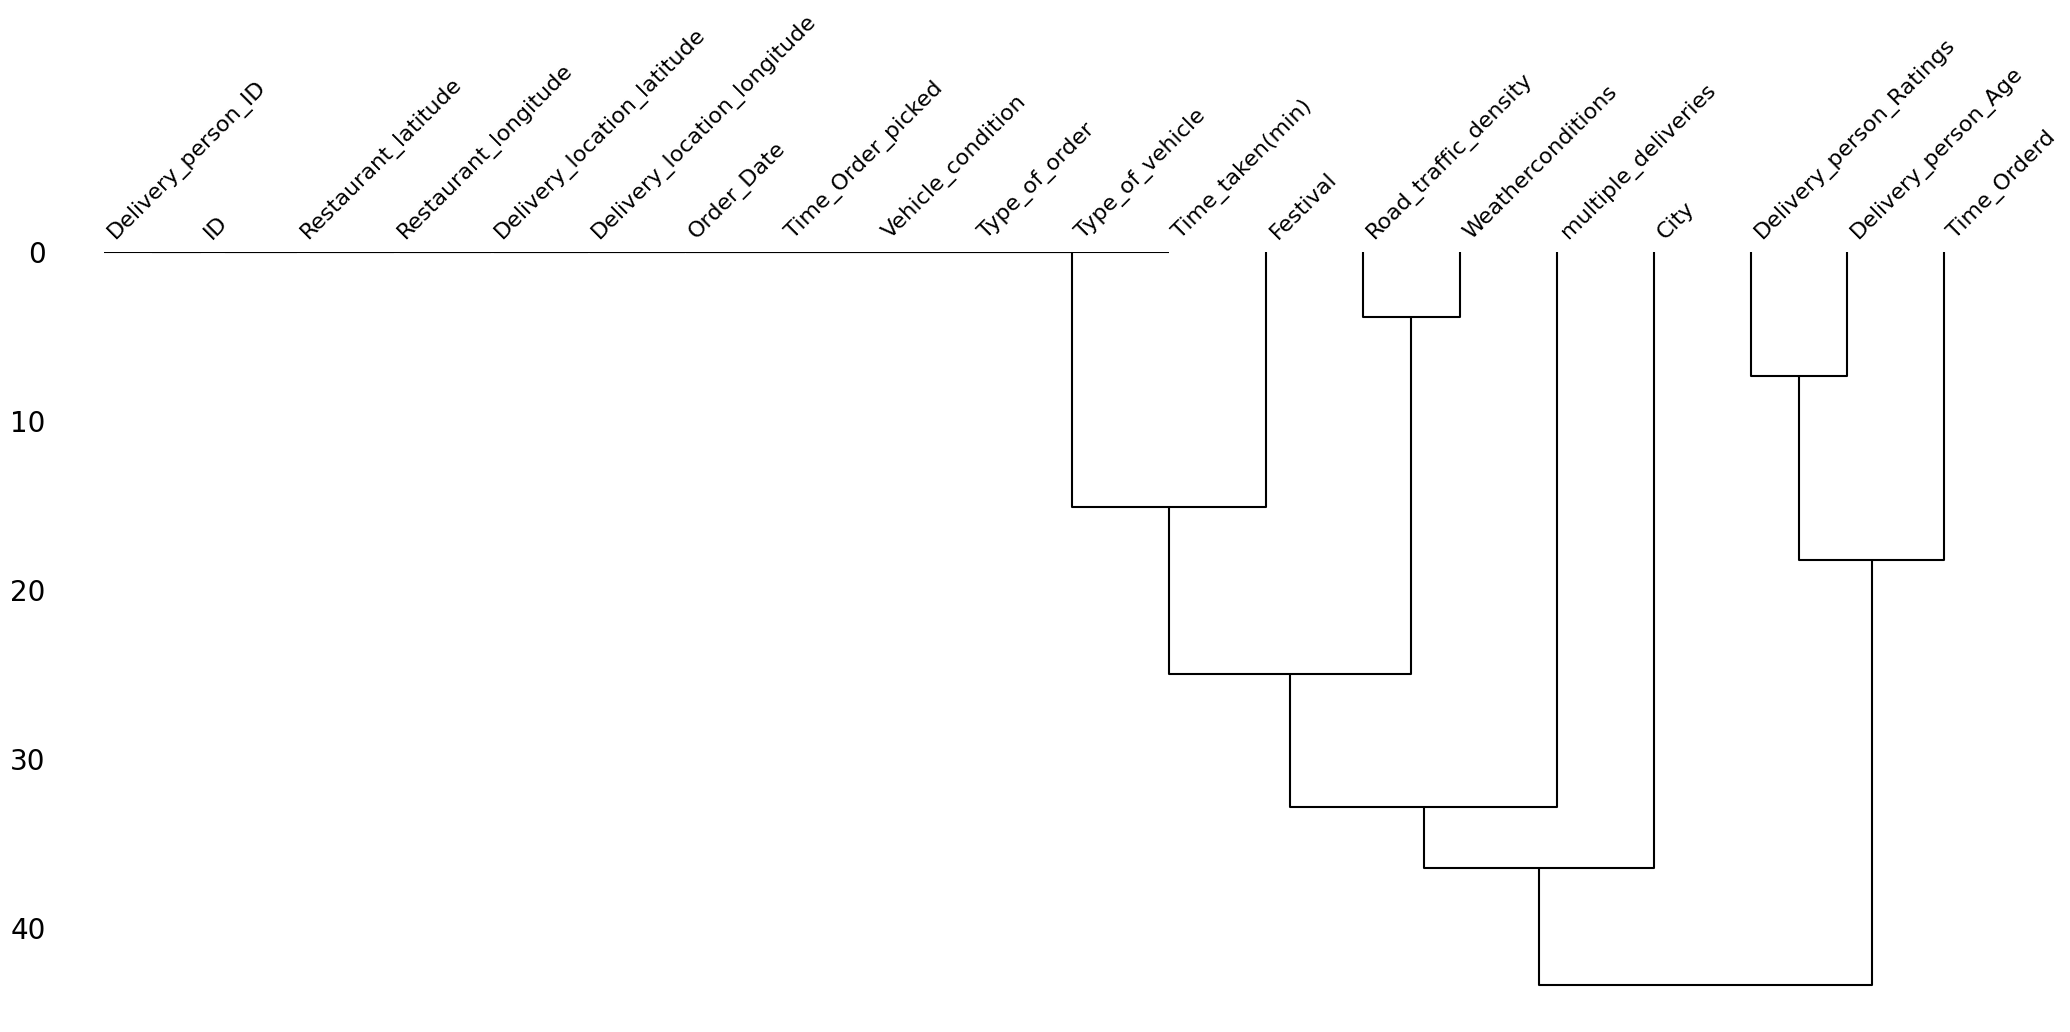

In [25]:
msno.dendrogram(missing_df)

In [26]:
missing_df.isna().any(axis=1).sum() / missing_df.shape[0] * 100

np.float64(9.266773408198627)

In [27]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [28]:
def change_column_names(data: pd.DataFrame):
    return (
        data.rename(str.lower,axis=1)
        .rename({
            "delivery_person_id" : "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_picked_time",
            "weatherconditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken(min)": "time_taken"},axis=1)
    )

In [29]:
# change column names

df = change_column_names(df)

In [30]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [31]:
df.drop(columns=['id', 'rider_id']).duplicated().sum()

np.int64(0)

In [32]:
df['id'].nunique()

45593

In [33]:
df.shape

(45593, 20)

In [34]:
df['rider_id'].value_counts()

rider_id
JAPRES11DEL02        67
PUNERES01DEL01       67
RANCHIRES02DEL01     66
VADRES08DEL02        66
JAPRES03DEL01        66
                     ..
BHPRES15DEL03         7
AURGRES13DEL03        7
KOLRES09DEL03         6
KOCRES16DEL03         6
BHPRES010DEL03        5
Name: count, Length: 1320, dtype: int64

In [35]:
# extract city name out of rider_id 

(df['rider_id']
 .str.split('RES').str[0]
 .rename("City_Name")
 )

0          INDO
1          BANG
2          BANG
3         COIMB
4          CHEN
          ...  
45588       JAP
45589       AGR
45590      CHEN
45591     COIMB
45592    RANCHI
Name: City_Name, Length: 45593, dtype: object

In [36]:
df['age'].dtype

dtype('O')

In [37]:
df['age'].astype(float).describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

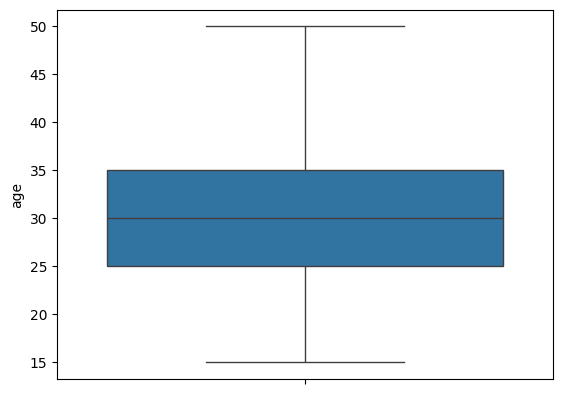

In [38]:
sns.boxplot(df['age'].astype(float))

In [39]:
minors_data = df.loc[df['age'].astype(float)<18]

In [40]:
minors_data.shape

(38, 20)

In [41]:
minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


**Observations**:

1. The star ratings of all the riders is 1.
2. The vehicle condition of these riders is very bad.
3. No weather and traffic conditions available.
4. Age of all these riders is 15 which is below the permissable age to drive a vehicle.
5. Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.

In [42]:
df['ratings'].dtype

dtype('O')

In [43]:
df['ratings'].astype(float).describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

<Axes: ylabel='ratings'>

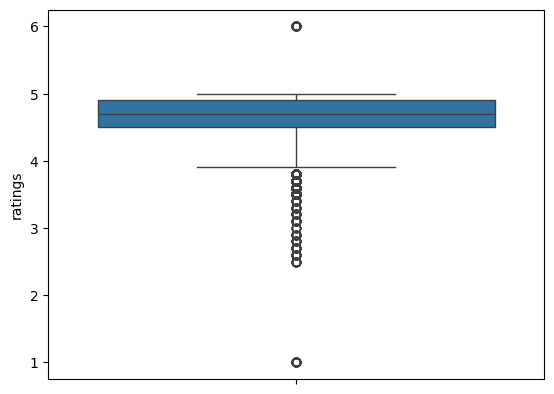

In [44]:
sns.boxplot(df['ratings'].astype(float))

In [45]:
six_star_data = df.loc[df['ratings'] == '6']

In [46]:
six_star_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
6394,0x427,JAPRES06DEL02,50,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20
7031,0x3eb,MYSRES15DEL02,50,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,conditions NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14
7681,0xd42,VADRES09DEL01,50,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22
9499,0x3f0,BANGRES010DEL01,50,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17
9535,0x3ef,RANCHIRES13DEL01,50,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,conditions NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32


In [47]:
six_star_data.shape

(53, 20)

In [48]:
minor_index = minors_data.index.tolist()
six_star_index = six_star_data.index.tolist()

In [49]:
location_cols = df.columns[4:8].tolist()

In [50]:
location_cols

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [51]:
location_subset = df.loc[: , location_cols]

In [52]:
location_subset.head()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982


**Valid values for lat and long**

 > India lies to the north of the equator between `6° 44′` and `35° 30′` north latitude and `68° 7′` and `97° 25′` east longitude.

In [53]:
location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [54]:
lower_bound_lat = 6.44 
lower_bound_long = 68.70 

In [55]:
df.loc[
    (df['restaurant_latitude']<lower_bound_lat) |
    (df['restaurant_longitude']<lower_bound_long) |
    (df['delivery_latitude']<lower_bound_lat) |
    (df['delivery_longitude']<lower_bound_long)
].shape

(4071, 20)

In [56]:
df.loc[
    (df['restaurant_latitude']<lower_bound_lat) |
    (df['restaurant_longitude']<lower_bound_long) |
    (df['delivery_latitude']<lower_bound_lat) |
    (df['delivery_longitude']<lower_bound_long)
].sample(50)

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3546,0xb322,VADRES16DEL01,34,4,0.000000,0.000000,0.110000,0.110000,02-03-2022,17:45:00,18:00:00,conditions Fog,Medium,1,Buffet,scooter,1,No,Metropolitian,(min) 32
33052,0x3366,VADRES16DEL01,39,4.6,0.000000,0.000000,0.040000,0.040000,13-03-2022,16:40:00,16:45:00,conditions Sandstorms,Medium,2,Meal,scooter,1,No,Urban,(min) 30
35648,0xc3ef,BHPRES09DEL01,23,5,0.000000,0.000000,0.010000,0.010000,11-02-2022,08:55:00,09:05:00,conditions Sunny,Low,2,Meal,electric_scooter,1,No,Metropolitian,(min) 15
6364,0xd854,DEHRES18DEL02,26,4.8,0.000000,0.000000,0.020000,0.020000,15-02-2022,10:45:00,10:55:00,conditions Windy,Low,2,Buffet,electric_scooter,1,No,Urban,(min) 14
19934,0xcf47,DEHRES01DEL01,35,4.5,0.000000,0.000000,0.010000,0.010000,13-02-2022,09:40:00,09:45:00,conditions Windy,Low,1,Snack,motorcycle,0,No,Urban,(min) 22
3106,0xbf75,AURGRES02DEL01,34,4.5,0.000000,0.000000,0.070000,0.070000,12-02-2022,22:20:00,22:25:00,conditions Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,(min) 22
30468,0x1df1,VADRES07DEL02,22,4.8,0.000000,0.000000,0.080000,0.080000,02-04-2022,19:30:00,19:45:00,conditions Windy,Jam,2,Meal,scooter,1,No,Urban,(min) 15
28915,0x77d8,RANCHIRES02DEL01,36,4.7,0.000000,0.000000,0.010000,0.010000,01-04-2022,11:45:00,11:50:00,conditions Fog,High,2,Meal,scooter,0,No,Urban,(min) 26
30140,0xdf9a,AURGRES20DEL02,28,4.6,0.000000,0.000000,0.130000,0.130000,12-02-2022,21:00:00,21:05:00,conditions Sunny,Jam,0,Drinks,motorcycle,0,No,Urban,(min) 21
4631,0x9555,VADRES16DEL03,29,4.6,0.000000,0.000000,0.030000,0.030000,11-03-2022,19:55:00,20:10:00,conditions Sunny,Jam,2,Snack,electric_scooter,1,No,Urban,(min) 18


In [57]:
# statistical summary of problematic rows where lat long is below the country's geographical limits

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

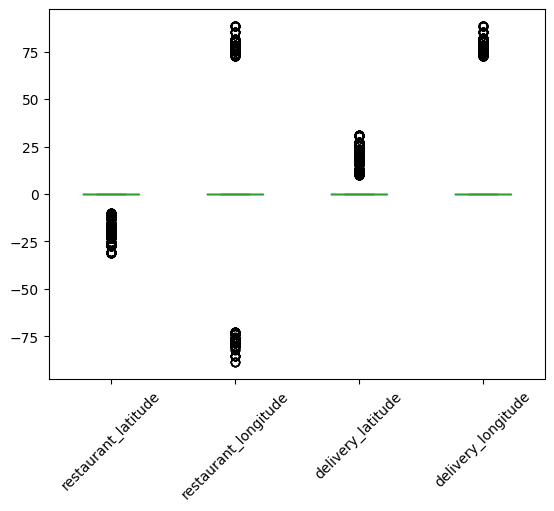

In [58]:
# boxplots for all the anomalies

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].plot(kind="box")

plt.xticks(rotation=45)

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

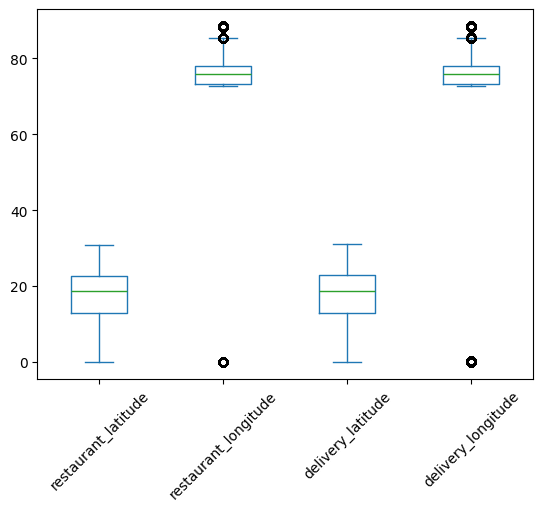

In [59]:
(
    location_subset.abs()
    .plot(kind="box")
)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [60]:
(location_subset.abs().loc[
    lambda df_:
    (df_['restaurant_latitude']<lower_bound_lat) |
    (df_['restaurant_longitude']<lower_bound_long) |
    (df_['delivery_latitude']<lower_bound_lat) |
    (df_['delivery_longitude']<lower_bound_long)
]).shape

(3640, 4)

In [61]:
# lat long values less than 1

location_subset.abs().loc[lambda df_:
                        (df_['restaurant_latitude'] < 1) |
                        (df_['restaurant_longitude'] < 1) |
                        (df_['delivery_latitude'] < 1) |
                        (df_['delivery_longitude'] < 1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


**All the messy lat long values are less than 1**

In [62]:
missing_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [117]:
def clean_lat_long(data: pd.DataFrame,threshold = 1):

    location_columns = location_subset.columns.tolist()

    return (
        data.assign(**{
            col:(
                np.where(data[col]<threshold,np.nan,data[col].values)
            )
            for col in location_columns 
        })
    )

In [64]:
clean_lat_long(df).isna().sum()

id                         0
rider_id                   0
age                        0
ratings                    0
restaurant_latitude     4071
restaurant_longitude    3802
delivery_latitude       3640
delivery_longitude      3640
order_date                 0
order_time                 0
order_picked_time          0
weather                    0
traffic                    0
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries        0
festival                   0
city_type                  0
time_taken                 0
dtype: int64

In [65]:
df['order_date'].isna().sum()

np.int64(0)

In [66]:
# unique values in order date

df['order_date'].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [67]:
order_date = pd.to_datetime(df['order_date'],dayfirst = True)
order_date.max() - order_date.min()

Timedelta('54 days 00:00:00')

In [68]:
order_date.agg(["min", "max"]).set_axis(['start', 'end'], axis = 0)

start   2022-02-11
end     2022-04-06
Name: order_date, dtype: datetime64[ns]

In [69]:
def extract_datetime_features(col):
    date_col = pd.to_datetime(col , dayfirst=True)

    return (

        pd.DataFrame(

        {
            "day":date_col.dt.day,
            "month": date_col.dt.month,
            "year":date_col.dt.year,
            "day_of_week":date_col.dt.day_name(),
            "is_weekend":date_col.dt.day_name().isin(["Saturday", "Sunday"]).astype(int)
        }
    )
    )

In [70]:
extract_datetime_features(df['order_date'])

,day,month,year,day_of_week,is_weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0


In [71]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

In [72]:
df['order_time']

0        11:30:00
1        19:45:00
2        08:30:00
3        18:00:00
4        13:30:00
           ...   
45588    11:35:00
45589    19:55:00
45590    23:50:00
45591    13:35:00
45592    17:10:00
Name: order_time, Length: 45593, dtype: object

In [73]:
missing_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [74]:
# extract hour info 

order_time_hr = pd.to_datetime(df.replace("NaN ",np.nan)['order_time'],format = 'mixed').dt.hour
order_time_hr

0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: order_time, Length: 45593, dtype: float64

In [102]:
def time_of_day(ser):

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [76]:
time_subset = df.loc[:,['order_time', 'order_picked_time']]

time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [77]:
time_subset.columns.tolist()

['order_time', 'order_picked_time']

In [78]:
(
    time_subset.assign(
        **{
            col:pd.to_datetime(time_subset[col].replace("NaN ",np.nan).dropna(),format = "mixed")
            for col in time_subset.columns.tolist()
        }
    )
.assign(
    pickup_time = lambda x:(x['order_picked_time'] - x['order_time']).dt.seconds/60,
    order_time_hour = lambda x: x['order_time'].dt.hour,
    order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
)
.drop(columns = ['order_time','order_picked_time'])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


In [79]:
df['weather'].value_counts()

weather
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [80]:
(
    df['weather'].str.replace("conditions ", "").unique()
)

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

In [81]:
df['traffic'].value_counts()

traffic
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: count, dtype: int64

In [82]:
df['traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [83]:
(
    df['traffic']
    .replace("NaN ", np.nan)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['high', 'jam', 'low', 'medium', nan], dtype=object)

In [84]:
np.sort(df['vehicle_condition'].unique())

array([0, 1, 2, 3])

In [85]:
df['type_of_order'].value_counts()

type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

In [86]:
(
    df['type_of_order']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

In [87]:
df['type_of_vehicle'].value_counts()

type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

In [88]:
df['type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [89]:
(
    df['type_of_vehicle']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [90]:
df['multiple_deliveries'].dtype

dtype('O')

In [91]:
# unique values in column

df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [92]:
# make the column as integer

(
    df['multiple_deliveries']
    .replace("NaN ",np.nan)
    .astype(float)
    .unique()
)

array([ 0.,  1.,  3., nan,  2.])

In [93]:
df['festival'].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

In [94]:
(
    df['festival']
    .replace("NaN ",np.nan)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['no', 'yes', nan], dtype=object)

In [95]:
df['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [96]:
(
    df['city_type']
    .replace("NaN ",np.nan)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

In [97]:
df['time_taken'].dtype

dtype('O')

In [98]:
(
    df['time_taken']
    .str.replace("(min) ","")
    .astype(int)
)

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: time_taken, Length: 45593, dtype: int64

In [99]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

In [106]:
def data_cleaning(data: pd.DataFrame):

    return (
        data
        .drop(columns= 'id')
        .drop(index = minor_index)
        .drop(index = six_star_index)
        .replace("NaN " , np.nan)
        .assign(
            city_name = lambda x: x['rider_id'].str.split('RES').str.get(0),

            age = lambda x : x['age'].astype(float),

            ratings = lambda x : x['ratings'].astype(float), 

            restaurant_latitude = lambda x : (x['restaurant_latitude'].abs()),

            restaurant_longitude = lambda x : x['restaurant_longitude'].abs(),

            delivery_latitude = lambda x : x['delivery_latitude'].abs(),

            delivery_longitude = lambda x : x['delivery_longitude'].abs(),

            order_date = lambda x: pd.to_datetime(x['order_date'], dayfirst = True),

            order_day = lambda x : x['order_date'].dt.day, 

            order_month = lambda x: x['order_date'].dt.month, 

            order_day_of_week = lambda x: x['order_date'].dt.day_name().str.lower(),

            is_weekend = lambda x : x['order_date'].dt.day_name().isin(['Saturday',"Sunday"]).astype(int),

            order_time = lambda x : pd.to_datetime(x['order_time'],format = 'mixed'),

            order_picked_time = lambda x : pd.to_datetime(x['order_picked_time'], format = 'mixed'),

            pickup_time_minutes = lambda x: (
                (x['order_picked_time'] - x['order_time']).dt.seconds/60
            ),

            order_time_hour = lambda x : x['order_time'].dt.hour,

            order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day),

            weather = lambda x: (
                x['weather']
                .str.replace("conditions ", "")
                .str.lower()
                .replace("nan",np.nan)
            ),

            traffic = lambda x : x['traffic'].str.rstrip().str.lower(),

            type_of_order = lambda x: x['type_of_order'].str.rstrip().str.lower(),

            type_of_vehicle = lambda x: x['type_of_vehicle'].str.rstrip().str.lower(),

            festival = lambda x: x['festival'].str.rstrip().str.lower(),

            city_type = lambda x : x['city_type'].str.rstrip().str.lower(),

            multiple_deliveries = lambda x: x['multiple_deliveries'].astype(float),

            time_taken = lambda x : (x['time_taken']
                                     .str.replace("(min) ", "")
                                     .astype(int)
                                     )
        ).drop(columns = ['order_time', 'order_picked_time'])

    )

In [107]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [108]:
df.shape

(45593, 20)

In [109]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

In [114]:
data_cleaning(df).iloc[0]

rider_id                    INDORES13DEL02 
age                                    37.0
ratings                                 4.9
restaurant_latitude               22.745049
restaurant_longitude              75.892471
delivery_latitude                 22.765049
delivery_longitude                75.912471
order_date              2022-03-19 00:00:00
weather                               sunny
traffic                                high
vehicle_condition                         2
type_of_order                         snack
type_of_vehicle                  motorcycle
multiple_deliveries                     0.0
festival                                 no
city_type                             urban
time_taken                               24
city_name                              INDO
order_day                                19
order_month                               3
order_day_of_week                  saturday
is_weekend                                1
pickup_time_minutes             

In [113]:
df.iloc[0]

id                               0x4607 
rider_id                 INDORES13DEL02 
age                                   37
ratings                              4.9
restaurant_latitude            22.745049
restaurant_longitude           75.892471
delivery_latitude              22.765049
delivery_longitude             75.912471
order_date                    19-03-2022
order_time                      11:30:00
order_picked_time               11:45:00
weather                 conditions Sunny
traffic                            High 
vehicle_condition                      2
type_of_order                     Snack 
type_of_vehicle              motorcycle 
multiple_deliveries                    0
festival                             No 
city_type                         Urban 
time_taken                      (min) 24
Name: 0, dtype: object

In [115]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [118]:
# add more data cleaning steps

cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


In [119]:
cleaned_data['age'].agg(["min","max"])

min    20.0
max    39.0
Name: age, dtype: float64

In [120]:
cleaned_data['ratings'].agg(["min","max"])

min    2.5
max    5.0
Name: ratings, dtype: float64

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,41872.000000,41872.000000,41872.000000,41872.000000
mean,18.913696,76.921664,18.977356,76.985325
std,5.467265,3.503107,5.469056,3.503260
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


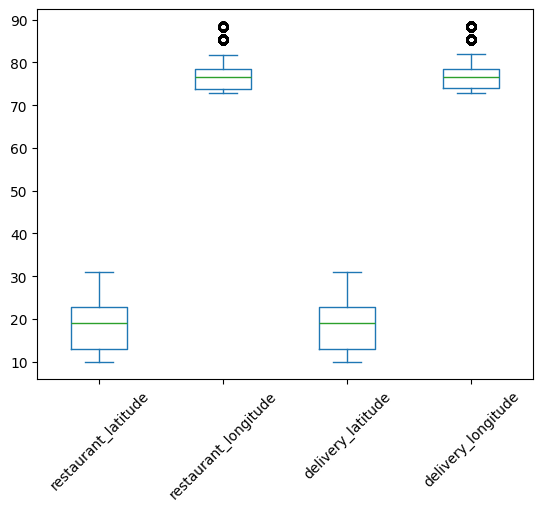

In [122]:
# location columns

cleaned_data[location_cols].plot(kind="box")

plt.xticks(rotation=45)

display(cleaned_data[location_cols].describe())

<Axes: >

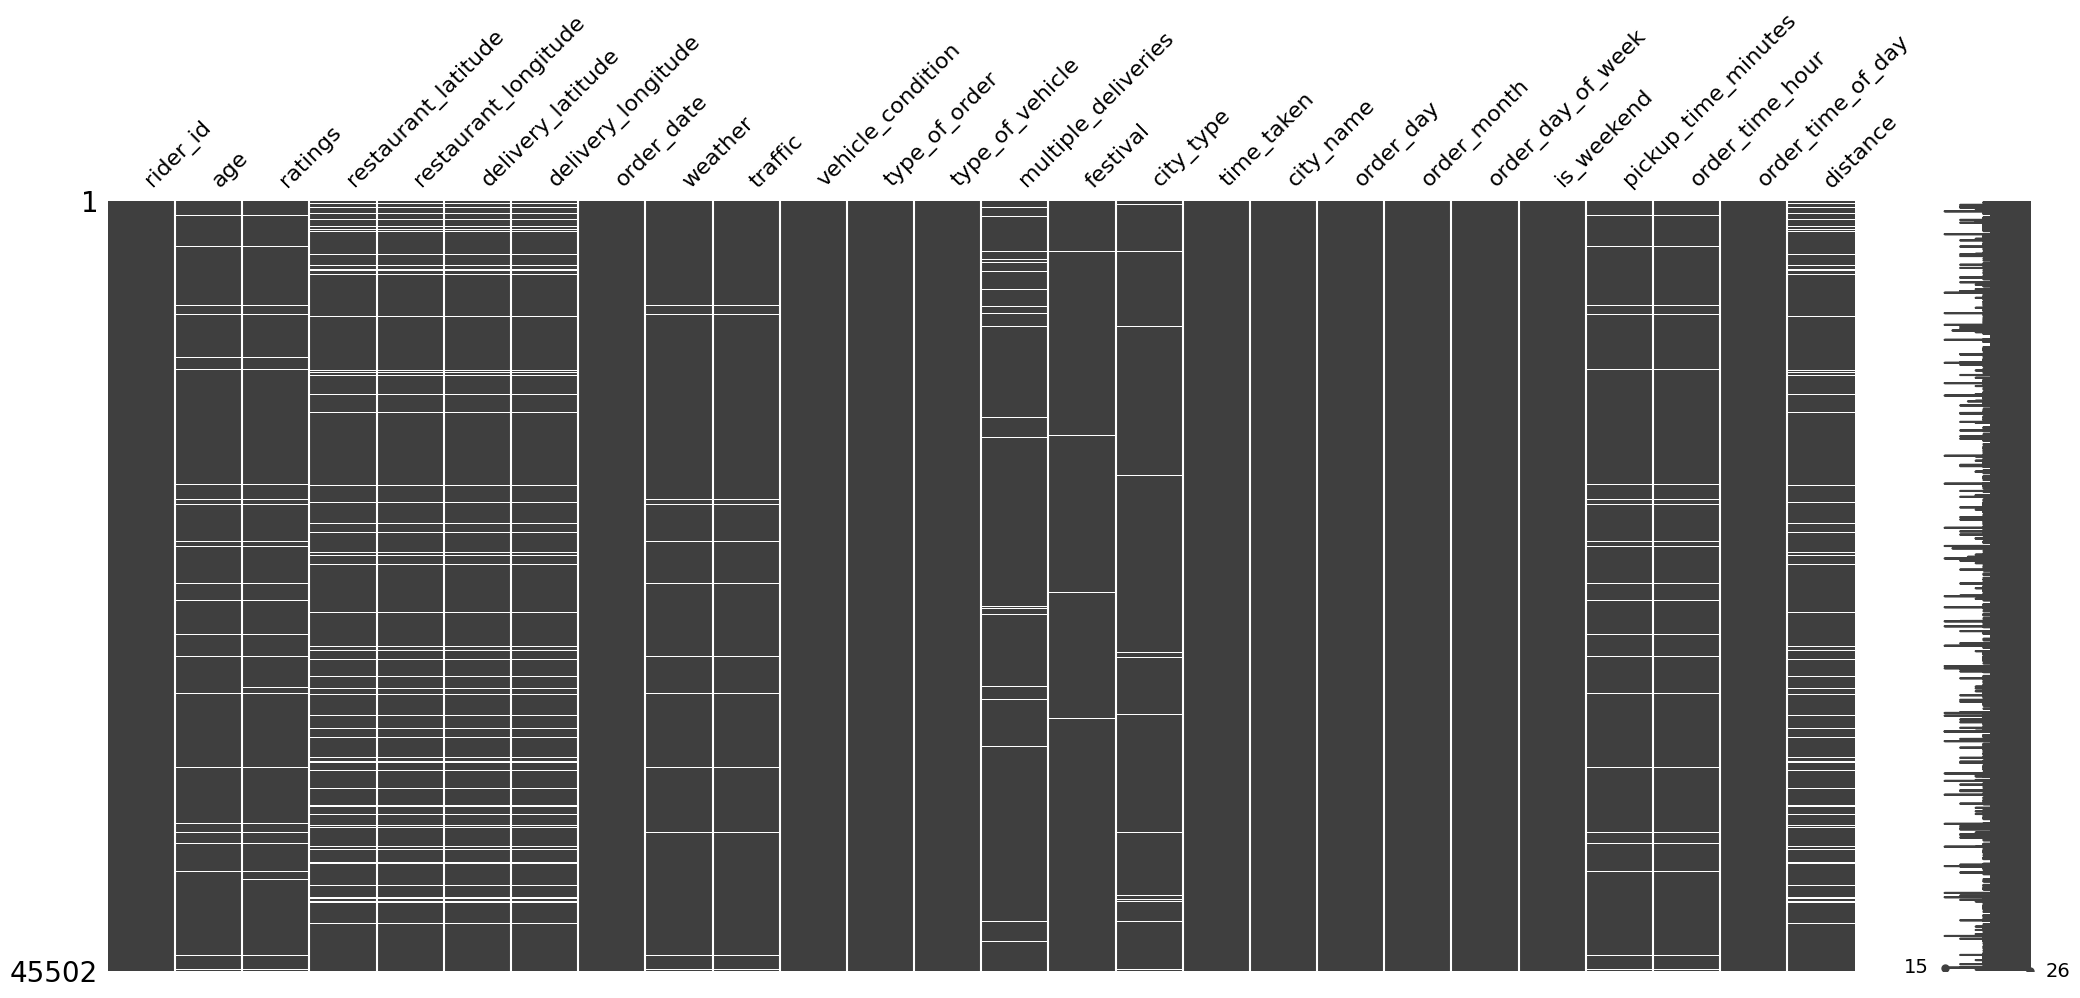

In [123]:
msno.matrix(cleaned_data)

<Axes: >

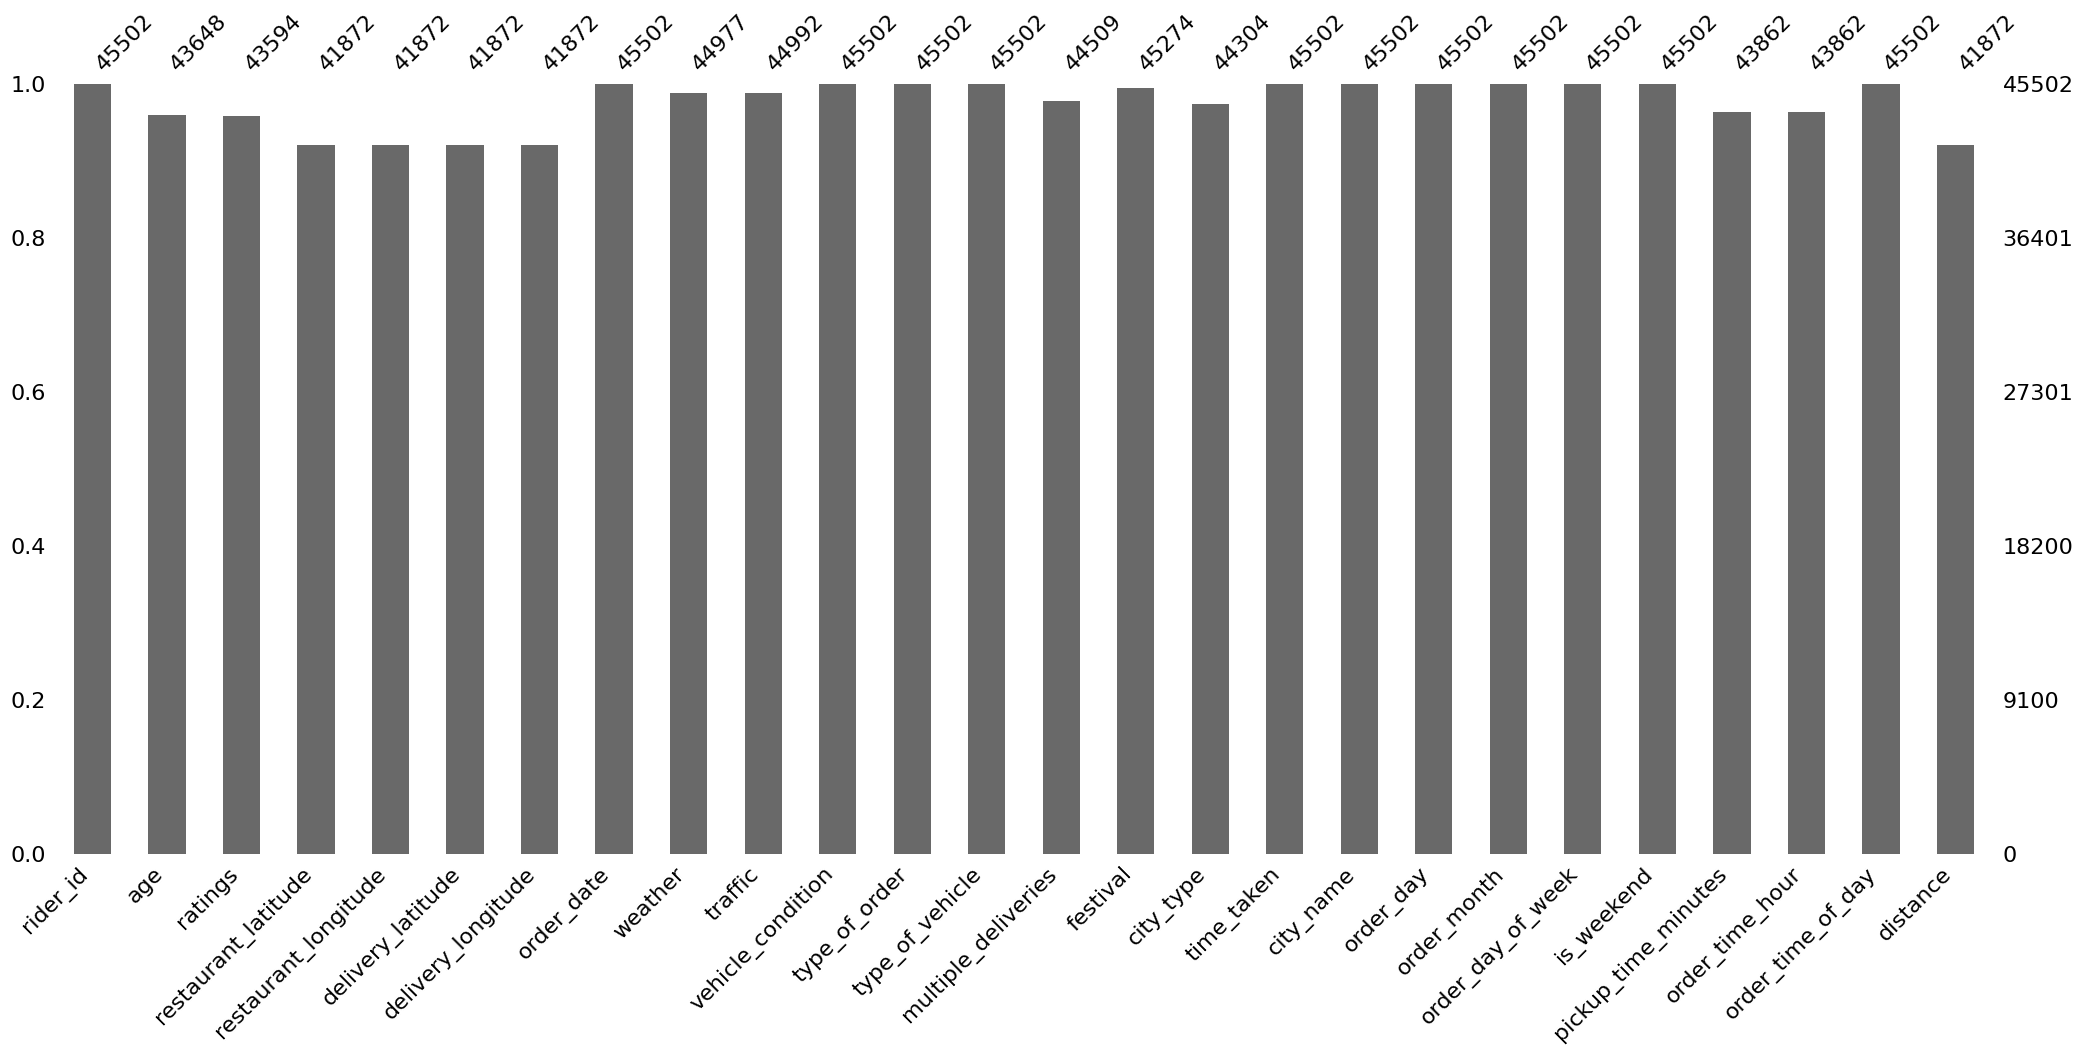

In [124]:
msno.bar(cleaned_data)

<Axes: >

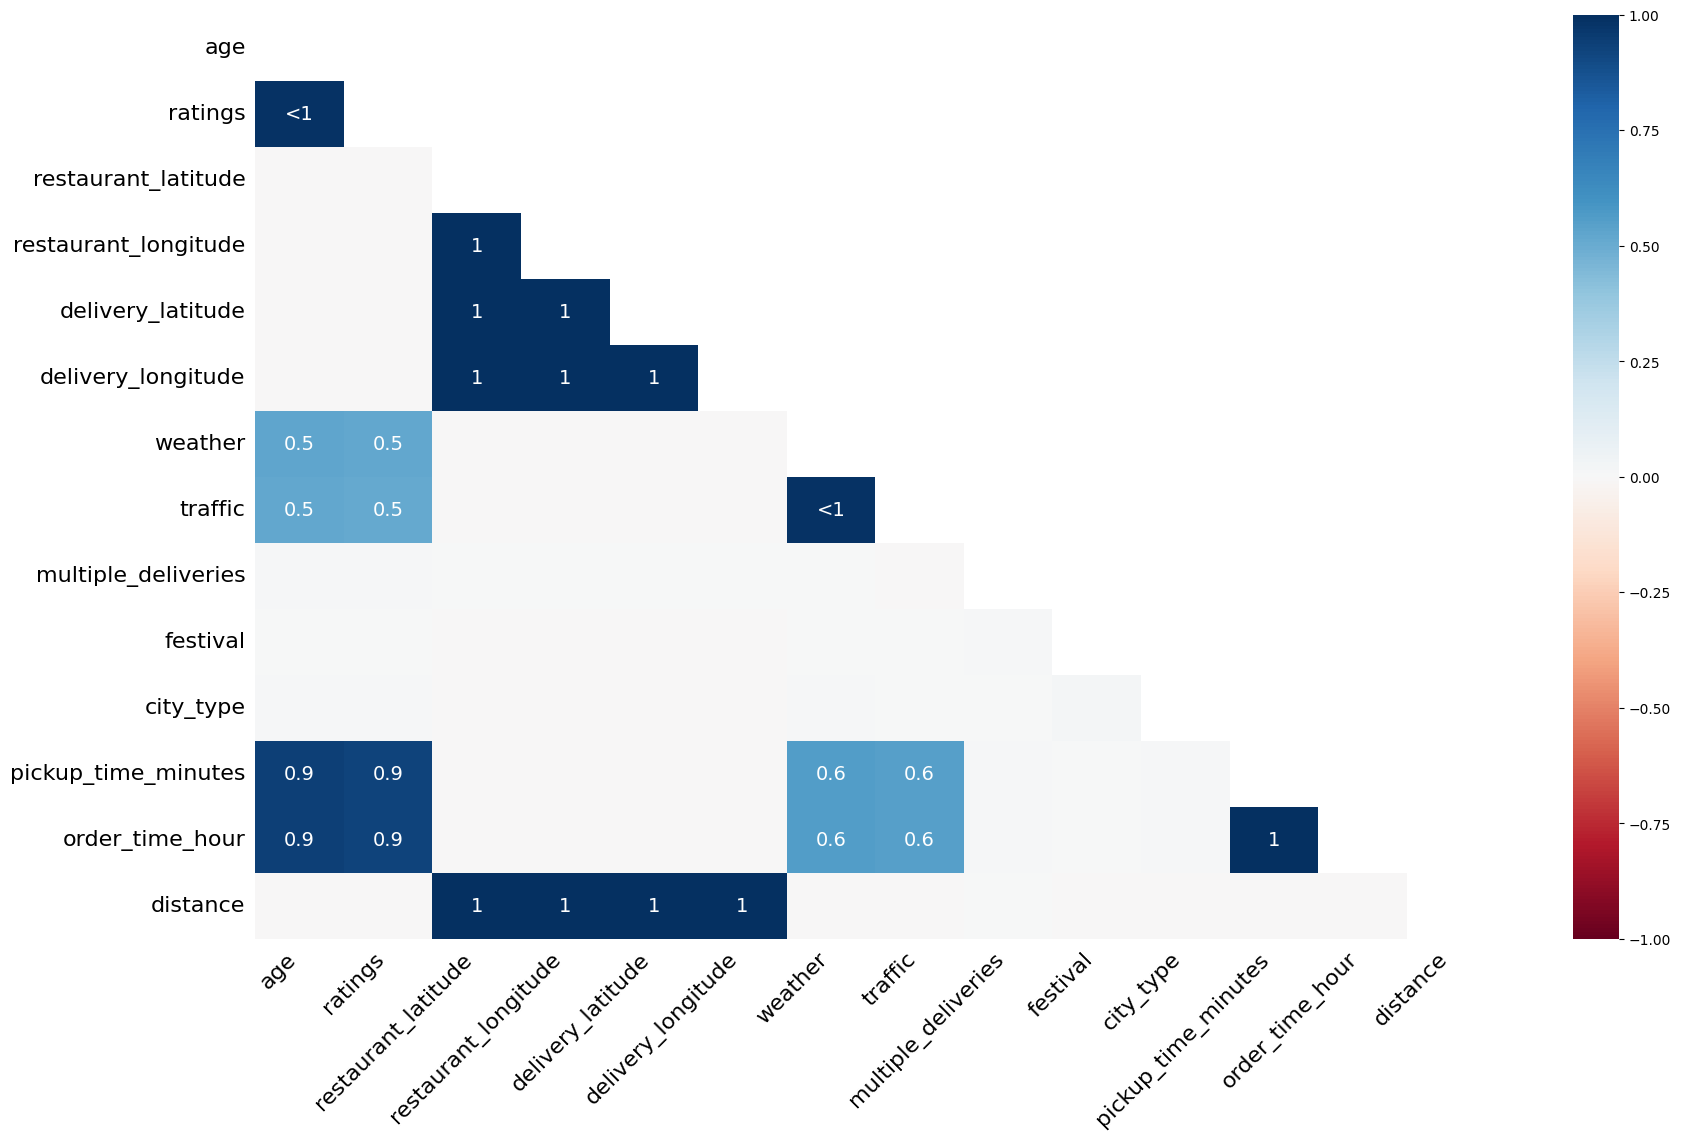

In [125]:
msno.heatmap(cleaned_data)

In [126]:
cleaned_data.to_csv("cleaned_data.csv",index=False)